# Classification 2

## Exercise 2: Classification using KNN

### Overview

In this exercise, we will begin our classification journey by building a baseline model using KNN. KNN is a simple, easy to understand method that is also very easy to use. It is a nonparametric algorithm that does not make any deep underlying assumption of the data. As such, they are free to 'learn' from the data without restriction. However they do have disadvantages such as:

- More data: Require a lot more training data to estimate the mapping function.
- Slower: A lot slower to train as they often have far more parameters to train.
- Overfitting: More of a risk to overfit the training data and it is harder to explain why specific predictions are made.

[This](https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/) blog article explains this further.

To do this exercise, you will need to have completed Exercise 1 and use the data saved from that. Complete the tasks in the text or in the code comments. You will also need to refer to the [Scikit documentation](https://scikit-learn.org/stable/documentation.html).

### Library Imports

In [1]:
# Basic Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [22]:
# TASK: Import the relevant Scikit-learn functions and Classes as required. You may have to keep modifying this cell as you discover more
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

## Data Ingestion

In [3]:
# TASK: Read in the CSV file saved from Exercise 1
file_path ='telco_churn.csv' # Filename
# The 1st column of the csv file should be the customer ID, which is loaded in the the Dataframe's index
input_data = pd.read_csv(file_path, index_col=0)

In [4]:
# Validate that data is as expected
input_data.head()

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel
CustomerID,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,M2M,Yes,mcheck,53.85,108.15,Yes
9237-HQITU,Female,No,No,Yes,2,Yes,No,FiberOptic,No,No,No,No,No,No,M2M,Yes,echeck,70.70,151.65,Yes
9305-CDSKC,Female,No,No,Yes,8,Yes,Yes,FiberOptic,No,No,Yes,No,Yes,Yes,M2M,Yes,echeck,99.65,820.50,Yes
7892-POOKP,Female,No,Yes,Yes,28,Yes,Yes,FiberOptic,No,No,Yes,Yes,Yes,Yes,M2M,Yes,echeck,104.80,3046.05,Yes
0280-XJGEX,Male,No,No,Yes,49,Yes,Yes,FiberOptic,No,Yes,Yes,No,Yes,Yes,M2M,Yes,transfer,103.70,5036.30,Yes


In [5]:
# Size of data - TASK: Validate that it's (7032, 20)
input_data.shape

(7032, 20)

## Feature Engineering

In [6]:
# Outcome variable
# Instead of keeping the values, we will encode as 1s and 0s using the map function
output_var_name = 'ChurnLabel'
output_var = input_data[output_var_name]
output_var = output_var.map({'Yes': 1, 'No': 0})
# Note that the map function can be run only once. You will get an error if you try to run this cell again as Yes/No are no longer valid values in this feature. 

# Count the number of rows for each outcome value
print("Row count for each outcome")
print(output_var.value_counts())

# Remove the outcome variable from the main dataframe
input_data.drop(output_var_name, axis=1, inplace=True)

Row count for each outcome
0    5163
1    1869
Name: ChurnLabel, dtype: int64


In [7]:
# Next, we want to define 3 lists for each of the data types found in our data i.e. Numerical, Categorical (more than 2 values), Binary (2 values only)

# Numerical features
num_features = [key for key in dict(input_data.dtypes) if dict(input_data.dtypes)[key] in ['int64', 'float64']]
print(num_features) # TASK: Confirm the columns based on Exercise 1

['TenureMonths', 'MonthlyCharges', 'TotalCharges']


In [8]:
# TASK: Define the 4 categorical features as a list of strings. These are the non-numerical features that do not have Yes/No values
cat_features = ['Gender', 'InternetService', 'Contract','PaymentMethod']# Categorical feature names

In [10]:
# TASK: Define the binary features. Complete the steps denoted in this cell.
# 1. Get the list of non-numerical features (both categorical and binary). Hint: Add 'not' to the code from num_features
bin_features = [key for key in dict(input_data.dtypes) if dict(input_data.dtypes)[key] not in ['int64', 'float64']] # Copy then modify the code from num_features

# 2. Remove the categorical feature names from this list
for col in cat_features:
    # Hint: There is a list method to remove an element
    if col in bin_features:
        bin_features.remove(col)
print(f"List of binary features: {bin_features}") # TASK: Confirm the resulting list

List of binary features: ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


In [11]:
# Encoding the binary features. Similar to the outcome variable, we will need to convert the values of these features from Yes/No to 1/0.
# Note: As an alternative, this could have been done when building the pipeline.
# TASK: Complete the code 
for col in bin_features:
    input_data[col] = input_data[col].map({'Yes': 1, 'No': 0})

In [12]:
# Display values after encoding
input_data.head()

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
CustomerID,,,,,,,,,,,,,,,,,,,
3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,M2M,1,mcheck,53.85,108.15
9237-HQITU,Female,0,0,1,2,1,0,FiberOptic,0,0,0,0,0,0,M2M,1,echeck,70.70,151.65
9305-CDSKC,Female,0,0,1,8,1,1,FiberOptic,0,0,1,0,1,1,M2M,1,echeck,99.65,820.50
7892-POOKP,Female,0,1,1,28,1,1,FiberOptic,0,0,1,1,1,1,M2M,1,echeck,104.80,3046.05
0280-XJGEX,Male,0,0,1,49,1,1,FiberOptic,0,1,1,0,1,1,M2M,1,transfer,103.70,5036.30


## Model Building

In [14]:
# Define preprocessing pipeline. Reminder that the binary features have already been encoded and thus only passed through
# TASK: Match the list of features to the correct encoding operation. 
# Remember to add the library imports for ColumnTransformer, StandardScaler, OneHotEncoder to the imports above
preprocess = ColumnTransformer(
    transformers=[
        ('standardscaler', StandardScaler(), num_features),
        ('onehotencoder', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'
)

In [20]:
# TASK: Complete the pipeline by adding the KNN Algorithm i.e. KNeighborClassifier
# At this moment, use the n_neighbors=5 as the parameter to KNeighborClassifier. Once this script is working, feel free to try out other values.
model = make_pipeline(
    preprocess,
    # TASK
    KNeighborsClassifier(n_neighbors=5)
)

In [23]:
# Train/Test Split
# TASK: Split the data into 70:30 train/test. Use the random_state=42
x_train, x_test, y_train, y_test = train_test_split(input_data, output_var,test_size=0.3, random_state=42) # TASK

In [24]:
# Check the dimensions of the data. TASK: Confirm as (2110, 19)
x_test.shape

(2110, 19)

In [25]:
# Train the pipeline. You can add a semi-colon (';') at the end of the line to supresses the output printing
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['TenureMonths', 'MonthlyCharges', 'TotalCharges']), ('one...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

### Evaluation

For regression problems, we are familiar with common metrics such as Root Means Square Error (RMSE) and the Coefficient of Determination (R<sup>2</sup> value).

With classification problems, we need a different set of metrics to evaluate the model. Here, we use metrics such as:

- Confusion Matrix
- Precision
- Recall
- F1 score
- ROC and AUC

Read the following blog posts to get familiar with these terms:

- https://hackernoon.com/idiots-guide-to-precision-recall-and-confusion-matrix-b32d36463556
- https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

Once you are done, proceed to the next cells.


In [26]:
# Apply the model on the test data
pred_test = model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [33]:
# TASK: Import the following metrics from scikit-learn in the library imports section above
# confusion_matrix, accuracy_score, precision, recall, f1_score, classification_report, roc_curve, auc
# Note that all these functions have the same parameter profile i.e. the first parameter contains the actual values while the second parameter contains the predicted values from the model.
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, roc_curve, auc , precision_score, recall_score, f1_score

In [29]:
# TASK: Calculate the confusion matrix
cm = confusion_matrix(y_test,pred_test) # TASK
print(cm)

[[1325  197]
 [ 248  340]]


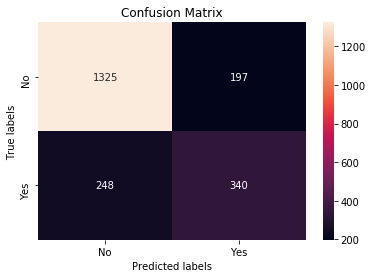

In [30]:
# Confusion Matrices typically are displayed in a graphical manner. Run this cell to display the matrix using this code snippet found online.
labels = ['No','Yes']
ax= plt.subplot()
sn.heatmap(cm, annot=True, ax = ax, fmt="d"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)
plt.show()

In [32]:
# TASK: Calculate the 4 following metrics using the correct function
# OPTIONAL: Calculate these metrics by hand (using the formulas in the reference blog posts) to validate the values

# 1. Accuracy = Sum of correctly predicted outcomes divided by total number of samples
accuracy = accuracy_score(y_test, pred_test)# TASK
print("Accuracy: {:.5f}".format(accuracy))

Accuracy: 0.78910


In [35]:
# 2. Precision - Of those predicted positive, how many of them are actual positive.
precision = precision_score(y_test, pred_test) # TASK
print("Precision: {:.5f}".format(precision))

Precision: 0.63315


In [36]:
# 3. Recall - how many of the actual positives our model is predicting as positives
recall = recall_score(y_test, pred_test)# TASK
print("Recall: {:.5f}".format(recall))

Recall: 0.57823


In [37]:
# 4. F1 score
f1 = f1_score(y_test, pred_test)#TASK
print("F1 Score: {:.5f}".format(f1))

F1 Score: 0.60444


In [38]:
# Alternatively, we can calculate all these metrics in one call using the classification_report function
print(classification_report(y_test, pred_test, digits=5))

              precision    recall  f1-score   support

           0    0.84234   0.87057   0.85622      1522
           1    0.63315   0.57823   0.60444       588

   micro avg    0.78910   0.78910   0.78910      2110
   macro avg    0.73774   0.72440   0.73033      2110
weighted avg    0.78404   0.78910   0.78606      2110



At this point, take a step back and try to understand these numbers. 

- What do these metrics mean in the context of the problem? 
- Which error (Type 1 or Type 2) is more important for this problem? And thus which metric is more important, Precision or Recall?

In [41]:
# TASK: Compute ROC and AUC. Note that roc_curve() returns 3 values. You will only need the first 2 as input to auc() i.e. use _ as the 3rd output
fpr, tpr, _ = roc_curve(y_test, pred_test) # TASK
#TASK = auc(fpr, tpr)
roc_auc = auc(fpr,tpr)

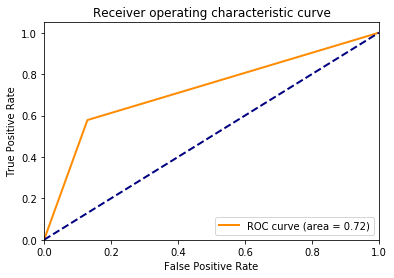

In [42]:
# Run this cell to plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

Congratulations! You have built a basic classication model. Complete the lesson quiz and proceed to the next lesson.